In [36]:
def read_csv(filename="water_consumption.csv"):
    with open(filename, "r") as f:
        data = f.readlines()
    return data[1::]  # ignore the header

In [37]:
import matplotlib as plt


# Graphically represent data through bar graphs
def plot_histogram(data, title, start_month, end_month):
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(data.index, data.values, color="blue")
    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Water Consumption (m3)")
    plt.xticks(range(start_month, end_month + 1))
    plt.show()

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# Load the data
df = pd.read_csv("water_consumption.csv")

# User inputs
def barplot_monthly_water_consumption():
    park_id = input("Enter the park identification: ")
    year = int(input("Enter the year: "))
    start_month = int(input("Enter the start month (1-12): "))
    end_month = int(input("Enter the end month (1-12): "))

    # Filter the data based on user inputs
    filtered_data = df[
        (df["Park Identification"] == park_id)
        & (df["Year"] == year)
        & (df["Month"] >= start_month)
        & (df["Month"] <= end_month)
    ]

    # Calculate the total water consumption for each month
    choosen_park_data = filtered_data.groupby("Month")["Consumption"].sum()

    plot_histogram(
        choosen_park_data,
        "Water Consumption in the Park with the choosen Water Consumption",
        start_month,
        end_month,
    )

In [62]:
import numpy as np
from matplotlib import pyplot as plt


def average_park_consuption():

    parks = df["Park Identification"].unique()
    choosen_parks = []

    num_of_parks = int(
        input(
            "Choose the number of parks you want to calculate the average water consumption: "
        )
    )

    for _ in range(num_of_parks):
        inv_park = True
        while inv_park:
            print("Available parks: ")
            print(parks)
            park_id = input("Enter the park identification: ")
            if park_id in parks:
                choosen_parks.append(park_id)
                inv_park = False
                parks = np.delete(parks, np.where(parks == park_id))
            else:
                print("Invalid park identification. Try again.")

    # Filter the data based on user inputs
    filtered_data = df[(df["Park Identification"].isin(choosen_parks))]

    # calculate the average consumption per park
    average_consumption = filtered_data.groupby("Park Identification")[
        "Consumption"
    ].mean()

    print(average_consumption)
 
    plot_histogram(
        average_consumption, "Average water consumption", 0, num_of_parks - 1
    )

Available parks: 
['park' 'as']
Available parks: 
['park']
Park Identification
as      8.0
park    2.6
Name: Consumption, dtype: float64


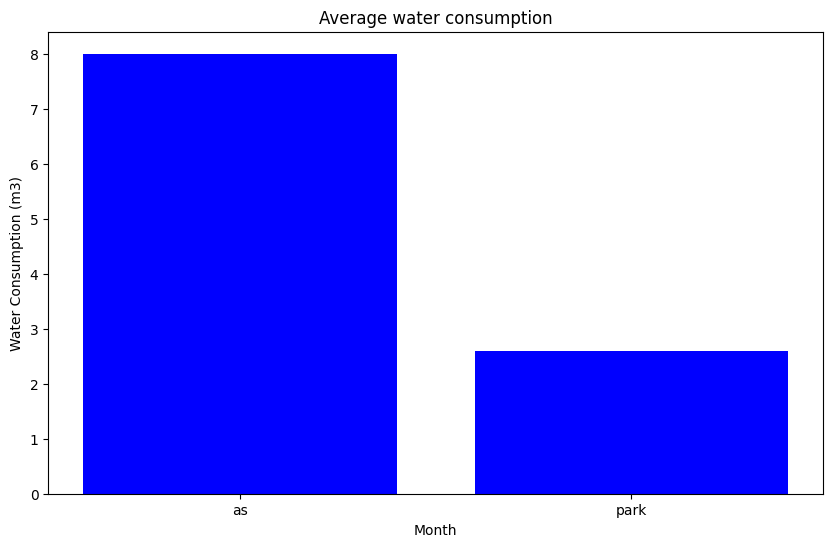